In [1]:
import numpy as np
from matplotlib import pyplot as pp
%matplotlib inline

In [2]:
# Initial parameters
xl = 2.0
rhol = 9.0
umax = 1.0
rhomax = 10
nx = 81
L = 4.0
nt = 30
sigma = 1.0

dx = L / (nx-1)
dt = sigma * dx / umax
x = np.linspace(0.0, L, num=nx)

In [3]:
def IC(x,xl=xl,rhol=rhol):
    rho = np.zeros(nx)
    mask = np.where(x<xl)
    rho[mask] = rhol * x[mask] / xl
    return rho

In [4]:
def flux(rho, umax=umax, rhomax=rhomax):
    F = rho * velocity(rho)
    return F

In [5]:
def velocity(rho, umax=umax, rhomax=rhomax):
    u = umax * (1 - rho / rhomax)
    return u

In [6]:
def ftbs(rho0, dx, dt, nt):
    rhon = [rho0.copy()]
    rho_next = rho0.copy()
    for n in range(nt):
        F = flux(rhon[-1])
        rho_next[1:-1] = rho_next[1:-1] - dt / dx * (F[1:-1] - F[:-2])
        rhon.append(rho_next.copy())
    return rhon

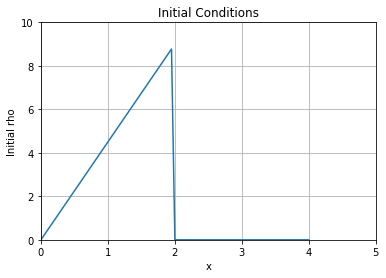

In [7]:
pp.plot(x,IC(x))
pp.xlim(0.0,5.0)
pp.ylim(0.0,10.0)
pp.title('Initial Conditions')
pp.xlabel('x')
pp.ylabel('Initial rho')
pp.grid()

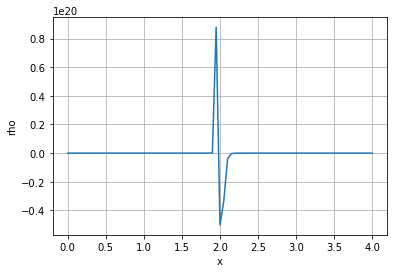

In [8]:
rho0 = IC(x)
rhox = ftbs(rho0, dx, dt, nt)

pp.plot(x,rhox[-1])
pp.xlabel('x')
pp.ylabel('rho')
pp.grid()

In [9]:
def plot(n,rhox,x):
    pp.figure()
    pp.title('Time step: {}'.format(n))
    pp.xlabel('Road')
    pp.ylabel('Traffic Density')
    pp.grid()
    pp.plot(x,rhox[n])
    pp.xlim(0.0, 4.0)
    pp.ylim(-0.5, 11.0)
    pp.show()

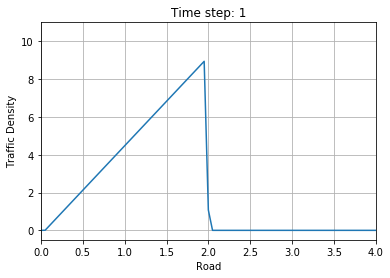

In [10]:
plot(1,rhox,x)

In [11]:
import ipywidgets

In [12]:
def interactive_plot(x, rhox):
    nt = len(rhox) -1
    nt_slider = ipywidgets.IntSlider(value=0, min=0,max=nt,step=1,
                                     descripion='Time step')
    w = ipywidgets.interactive(plot,n=nt_slider,
                               x=ipywidgets.fixed(x), 
                               rhox=ipywidgets.fixed(rhox))
    return w

In [13]:
interactive_plot(x, rhox)

interactive(children=(IntSlider(value=0, description='n', max=30), Output()), _dom_classes=('widget-interact',…